In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from encoding.pulse_width_modulation import PulseWidthModulation

# Set random seed for reproducibility
torch.manual_seed(42)

/home/jona/mambaforge/envs/neuro/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


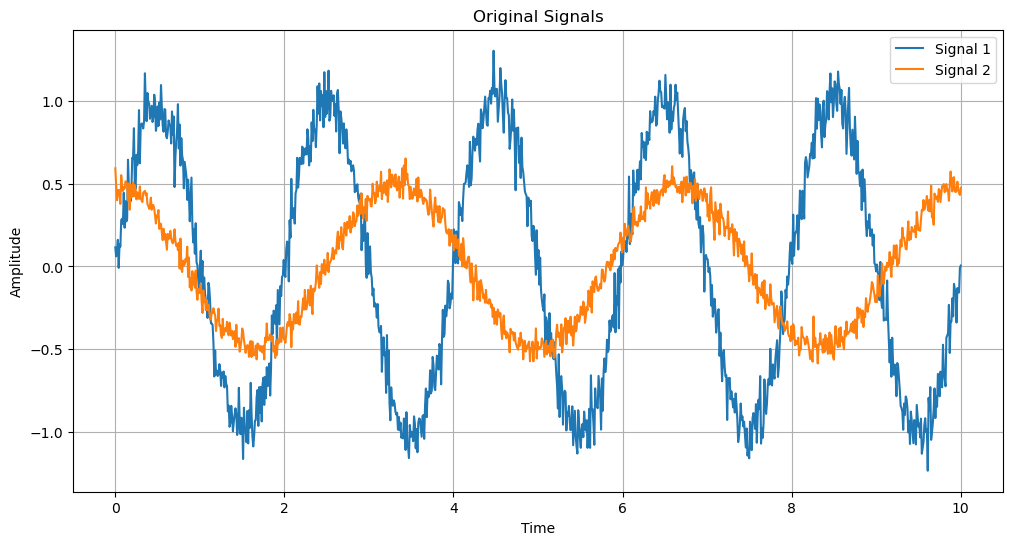

In [2]:
# Create a simple sine wave with some noise
t = np.linspace(0, 10, 1000)
signal = np.sin(2 * np.pi * 0.5 * t) + 0.1 * np.random.randn(len(t))

# Create a second signal to demonstrate multi-channel encoding
signal2 = 0.5 * np.cos(2 * np.pi * 0.3 * t) + 0.05 * np.random.randn(len(t))

# Stack signals and convert to torch tensor [features, time_steps]
signals = torch.tensor(np.stack([signal, signal2]), dtype=torch.float32)

# Plot original signals
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Signal 1')
plt.plot(t, signal2, label='Signal 2')
plt.title('Original Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

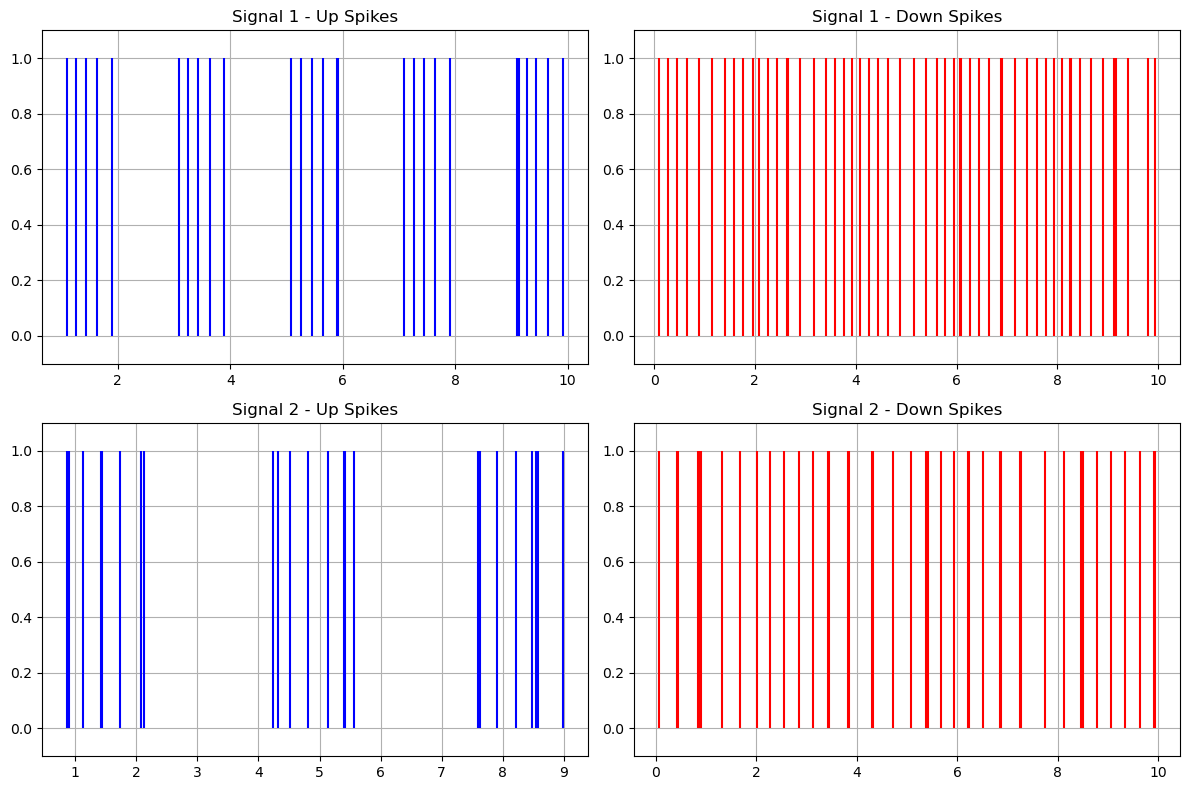

In [3]:
# Initialize the encoder with specific frequencies for each channel
encoder = PulseWidthModulation(
    frequency=torch.tensor([50.0, 30.0]),  # Different frequencies for each channel
    init_val=signals[:, 0],                # Initial values from first timestep
    down_spike=True                        # Enable negative spikes
)

# Encode the signals
spikes = encoder.encode(signals)

# Plot the spikes for both channels
plt.figure(figsize=(12, 8))

# Plot spikes for first signal
plt.subplot(2, 2, 1)
spike_times = t[spikes[0, 0].bool()]  # Get times where spikes occur
plt.vlines(spike_times, 0, 1, colors='b', label='Up spikes')
plt.title('Signal 1 - Up Spikes')
plt.ylim(-0.1, 1.1)
plt.grid(True)

plt.subplot(2, 2, 2)
spike_times = t[spikes[1, 0].bool()]
plt.vlines(spike_times, 0, 1, colors='r', label='Down spikes')
plt.title('Signal 1 - Down Spikes')
plt.ylim(-0.1, 1.1)
plt.grid(True)

# Plot spikes for second signal
plt.subplot(2, 2, 3)
spike_times = t[spikes[0, 1].bool()]
plt.vlines(spike_times, 0, 1, colors='b', label='Up spikes')
plt.title('Signal 2 - Up Spikes')
plt.ylim(-0.1, 1.1)
plt.grid(True)

plt.subplot(2, 2, 4)
spike_times = t[spikes[1, 1].bool()]
plt.vlines(spike_times, 0, 1, colors='r', label='Down spikes')
plt.title('Signal 2 - Down Spikes')
plt.ylim(-0.1, 1.1)
plt.grid(True)

plt.tight_layout()
plt.show()

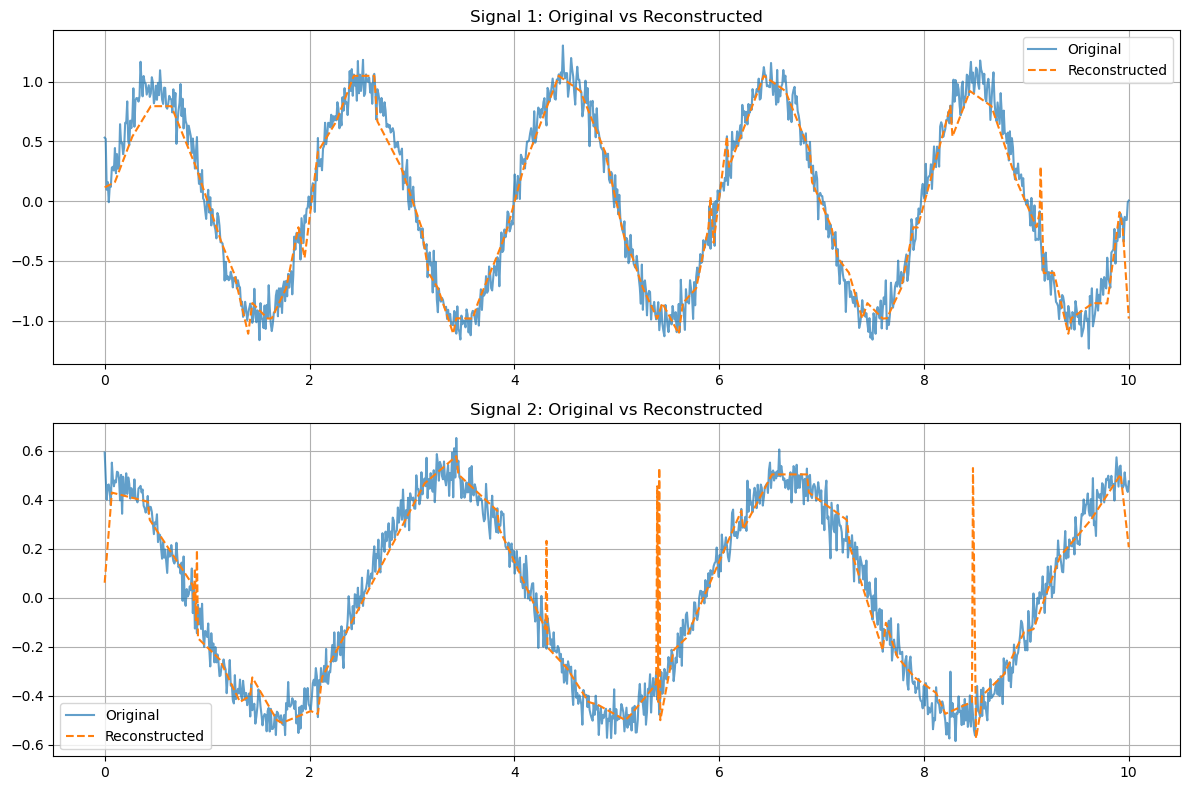

Mean Squared Error - Signal 1: 0.020079
Mean Squared Error - Signal 2: 0.008156


In [4]:
# Decode the spikes back to signals
reconstructed = encoder.decode(spikes)

# Plot original vs reconstructed signals
plt.figure(figsize=(12, 8))

# Plot first signal comparison
plt.subplot(2, 1, 1)
plt.plot(t, signals[0], label='Original', alpha=0.7)
plt.plot(t, reconstructed[0].numpy(), label='Reconstructed', linestyle='--')
plt.title('Signal 1: Original vs Reconstructed')
plt.legend()
plt.grid(True)

# Plot second signal comparison
plt.subplot(2, 1, 2)
plt.plot(t, signals[1], label='Original', alpha=0.7)
plt.plot(t, reconstructed[1].numpy(), label='Reconstructed', linestyle='--')
plt.title('Signal 2: Original vs Reconstructed')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print reconstruction error for each signal
mse_1 = torch.mean((signals[0] - reconstructed[0]) ** 2)
mse_2 = torch.mean((signals[1] - reconstructed[1]) ** 2)
print(f'Mean Squared Error - Signal 1: {mse_1:.6f}')
print(f'Mean Squared Error - Signal 2: {mse_2:.6f}')

  0%|          | 0/50 [00:00<?, ?it/s]

Best trial: 21. Best value: 0.0251503: 100%|██████████| 50/50 [00:22<00:00,  2.25it/s]


Best trial: 30. Best value: 0.00481397: 100%|██████████| 50/50 [00:21<00:00,  2.32it/s]


best_frequency=tensor([84.3134, 63.3935])
best_MA_window=tensor([1., 1.])
Optimized frequencies: tensor([84.3134, 63.3935])


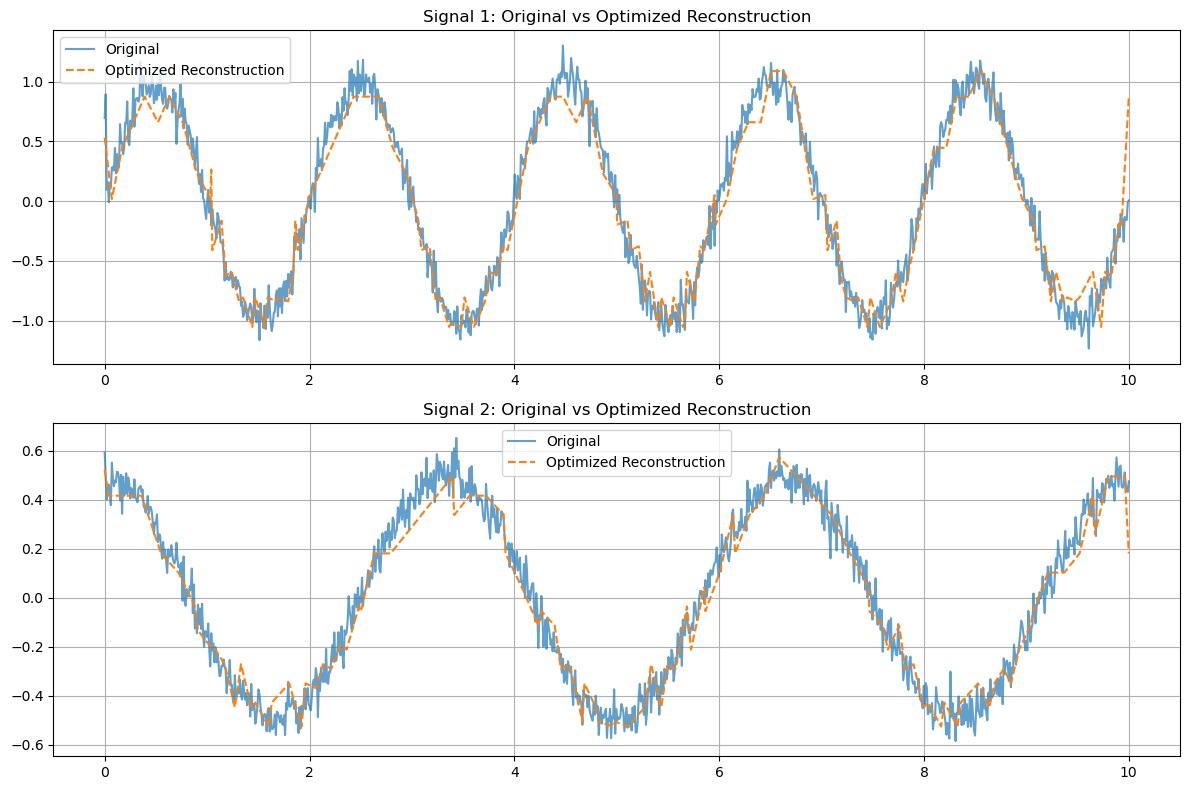

Optimized Mean Squared Error - Signal 1: 0.025364
Optimized Mean Squared Error - Signal 2: 0.004810


In [6]:
# Note: This may take some time to run
optimized_frequency = encoder.optimize(
    signals,
    trials=50,  # Reduced number of trials for demonstration
    plot_history=True
)

print(f'Optimized frequencies: {optimized_frequency}')

# Encode and decode with optimized parameters
encoder.frequency = optimized_frequency  # Update encoder with optimized frequencies
optimized_spikes = encoder.encode(signals)
optimized_reconstruction = encoder.decode(optimized_spikes)

# Plot the results with optimized parameters
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, signals[0], label='Original', alpha=0.7)
plt.plot(t, optimized_reconstruction[0].numpy(), label='Optimized Reconstruction', linestyle='--')
plt.title('Signal 1: Original vs Optimized Reconstruction')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, signals[1], label='Original', alpha=0.7)
plt.plot(t, optimized_reconstruction[1].numpy(), label='Optimized Reconstruction', linestyle='--')
plt.title('Signal 2: Original vs Optimized Reconstruction')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print optimized reconstruction error
optimized_mse_1 = torch.mean((signals[0] - optimized_reconstruction[0]) ** 2)
optimized_mse_2 = torch.mean((signals[1] - optimized_reconstruction[1]) ** 2)
print(f'Optimized Mean Squared Error - Signal 1: {optimized_mse_1:.6f}')
print(f'Optimized Mean Squared Error - Signal 2: {optimized_mse_2:.6f}')